In [1]:
from google.colab import drive
import os
import pandas as pd

#definations

In [2]:
drive.mount('/content/drive')

drive = "/content/drive/MyDrive/College/UIDAI_hackathon/api_data_aadhar_enrolment/"

Mounted at /content/drive


#Preprocesssing

### creating merged csv

In [ ]:
df1 = pd.read_csv(os.path.join(drive,"api_data_aadhar_enrolment_0_500000.csv"))
df2 = pd.read_csv(os.path.join(drive,"api_data_aadhar_enrolment_500000_1000000.csv"))
df3 = pd.read_csv(os.path.join(drive,"api_data_aadhar_enrolment_1000000_1006029.csv"))

final_df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

# final_df.to_csv("final_data.csv", index=False)

In [ ]:
print(final_df)

               date          state          district  pincode  age_0_5  \
0        02-03-2025      Meghalaya  East Khasi Hills   793121       11   
1        09-03-2025      Karnataka   Bengaluru Urban   560043       14   
2        09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29   
3        09-03-2025  Uttar Pradesh           Aligarh   202133       62   
4        09-03-2025      Karnataka   Bengaluru Urban   560016       14   
...             ...            ...               ...      ...      ...   
1006024  31-12-2025    West Bengal    West Midnapore   721149        2   
1006025  31-12-2025    West Bengal    West Midnapore   721150        2   
1006026  31-12-2025    West Bengal    West Midnapore   721305        0   
1006027  31-12-2025    West Bengal    West Midnapore   721504        1   
1006028  31-12-2025    West Bengal    West Midnapore   721517        2   

         age_5_17  age_18_greater  
0              61              37  
1              33              39  
2  

### data clearing

-----------------------------------
cleaning of state col

In [ ]:
final_df["state_clean"] = (
    final_df["state"]
    .astype(str)
    .str.strip()          # remove extra spaces
    .str.replace(r"\s+", " ", regex=True)  # fix double spaces
    .str.title()          # consistent capitalization
)

In [ ]:
unique_states = final_df['state_clean'].unique()
unique_states.sort()
print(unique_states)
print(len(unique_states))

['100000' 'Andaman & Nicobar Islands' 'Andaman And Nicobar Islands'
 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Dadra & Nagar Haveli' 'Dadra And Nagar Haveli'
 'Dadra And Nagar Haveli And Daman And Diu' 'Daman & Diu' 'Daman And Diu'
 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jammu And Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh'
 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Orissa' 'Pondicherry' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bangal' 'West Bengal' 'Westbengal']
48


In [ ]:
final_df['state_clean'] = final_df['state_clean'].replace({
    "100000":"Lakshadweep",
    "Andaman & Nicobar Islands":"Andaman And Nicobar Islands",
    "Dadra & Nagar Haveli": "Dadra And Nagar Haveli",
    "Daman & Diu": "Daman And Diu",
    "Jammu & Kashmir": "Jammu And Kashmir",
    "Orissa": "Odisha",
    "Pondicherry":"Puducherry",
    "The Dadra And Nagar Haveli And Daman And Diu" : "Dadra And Nagar Haveli And Daman And Diu",
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal"
})

In [ ]:
unique_states_clean = final_df['state_clean'].unique()
unique_states_clean.sort()
print(unique_states_clean)
print(len(unique_states_clean))

['Andaman And Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra And Nagar Haveli'
 'Dadra And Nagar Haveli And Daman And Diu' 'Daman And Diu' 'Delhi' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
38


------------------------
cleaning of district col

In [ ]:
print(final_df['district'].unique())

['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'Purbi Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind' 'Gwalior' 'Katni'
 'Coochbehar' 'Lucknow' 'Dinajpur Uttar' 'Marigaon' 'Kokrajhar' 'Agra'
 'Haridwar' 'Nagaon' 'Parbhani' 'West Khasi Hills' 'North West Delhi'
 'West Jaintia Hills' 'Unnao' 'Saharanpur' 'Dibrugarh' 'Udalguri'
 'Chirang' 'Kamrup' 'Dhubri' 'Jaunpur' 'Thane' 'Dhemaji' 'Banas Kantha'
 'Tinsukia' 'Spsr Nellore' 'Barpeta' 'Sonitpur' 'Baksa' 'Ludhiana' 'Patan'
 'Kanchipuram' 'Patna' 'Lakhimpur' 'Bongaigaon' 'Vadodara' 'Nainital'
 'Dehradun' 'Hojai' 'Dohad' 'Morbi' 'Raipur' 'Gorakhpur' 'Bulandshahr'
 'Mathura' 'Pashchim Champaran' 'Bijapur' 'Deoghar' 'Muzaffarpur' 'Banda'
 'Kachchh' 'Ri Bhoi' 'Darrang' 'Ashok Nagar' 'Darjeeling'
 'North Cachar Hills' 'Ranchi' 'Surat' 'Nanded' 'Bengaluru' 'Jorhat'
 'Gir Somnath' 'Kam

In [ ]:
final_df["district_clean"] = (
    final_df["district"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"[^\w\s\-\(\)]", "", regex=True)
    .str.title()
)

In [ ]:
final_df['district_clean'].unique()

array(['East Khasi Hills', 'Bengaluru Urban', 'Kanpur Nagar', 'Aligarh',
       'Sitamarhi', 'Bahraich', 'Firozabad', 'Purbi Champaran',
       'Maharajganj', 'Chhatrapati Sambhajinagar', 'Ghaziabad',
       'Faridabad', 'Madhubani', 'Sikar', 'Bhagalpur', 'Amritsar',
       'Gurugram', 'Gautam Buddha Nagar', 'West Delhi', 'Bhind',
       'Gwalior', 'Katni', 'Coochbehar', 'Lucknow', 'Dinajpur Uttar',
       'Marigaon', 'Kokrajhar', 'Agra', 'Haridwar', 'Nagaon', 'Parbhani',
       'West Khasi Hills', 'North West Delhi', 'West Jaintia Hills',
       'Unnao', 'Saharanpur', 'Dibrugarh', 'Udalguri', 'Chirang',
       'Kamrup', 'Dhubri', 'Jaunpur', 'Thane', 'Dhemaji', 'Banas Kantha',
       'Tinsukia', 'Spsr Nellore', 'Barpeta', 'Sonitpur', 'Baksa',
       'Ludhiana', 'Patan', 'Kanchipuram', 'Patna', 'Lakhimpur',
       'Bongaigaon', 'Vadodara', 'Nainital', 'Dehradun', 'Hojai', 'Dahod',
       'Morbi', 'Raipur', 'Gorakhpur', 'Bulandshahr', 'Mathura',
       'Pashchim Champaran', 'Vijayapura',

In [ ]:
final_df['district_clean'] = final_df['district_clean'].replace({
    # --- Official Renaming ---
    'Allahabad': 'Prayagraj',
    'Faizabad': 'Ayodhya',
    'Gurgaon': 'Gurugram',
    'Mewat': 'Nuh',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Aurangabad(Bh)': 'Aurangabad', # Distinguishing Bihar's Aurangabad
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Osmanabad': 'Dharashiv',
    'Ahmednagar': 'Ahilyanagar',
    'Ahmadnagar': 'Ahilyanagar',
    'Ahmed Nagar': 'Ahilyanagar',

    # --- Karnataka (Anglicized -> Local) ---
    'Bangalore': 'Bengaluru',
    'Bangalore Rural': 'Bengaluru Rural',
    'Belgaum': 'Belagavi',
    'Bellary': 'Ballari',
    'Bijapur': 'Vijayapura',
    'Bijapur(Kar)': 'Vijayapura',
    'Chikmagalur': 'Chikkamagaluru',
    'Chickmagalur': 'Chikkamagaluru',
    'Gulbarga': 'Kalaburagi',
    'Hospet': 'Vijayanagara',
    'Hubli': 'Hubballi',
    'Mysore': 'Mysuru',
    'Shimoga': 'Shivamogga',
    'Tumkur': 'Tumakuru',

    # --- Spelling/Transliteration Variations ---
    'Ahmadabad': 'Ahmedabad',
    'Baleshwar': 'Balasore', # Or Baleswar, depending on preference
    'Baleswar': 'Balasore',
    'Barddhaman': 'Bardhaman',
    'Burdwan': 'Bardhaman',
    'Baramula': 'Baramulla',
    'Bulandshahar': 'Bulandshahr',
    'Chittaurgarh': 'Chittorgarh',
    'Dantewada': 'Dakshin Bastar Dantewada',
    'Dohad': 'Dahod',
    'Gondiya': 'Gondia',
    'Gondiya ': 'Gondia', # Trailing space handling
    'Hardwar': 'Haridwar',
    'Howrah': 'Haora', # Official census often uses Haora, but Howrah is common
    'Hawrah': 'Haora',
    'Hugli': 'Hooghly',
    'Jajapur': 'Jajpur',
    'Jalo': 'Jalore',
    'Jalor': 'Jalore',
    'Kancheepuram': 'Kanchipuram',
    'Keri': 'Kheri', # Assuming Lakhimpur Kheri
    'Khordha': 'Khorda',
    'Mahabub Nagar': 'Mahabubnagar',
    'Mahbubnagar': 'Mahabubnagar',
    'Medinipur': 'Paschim Medinipur', # Note: Medinipur was split, usually requires context
    'Midnapore': 'Paschim Medinipur',
    'Nabarangapur': 'Nabarangpur',
    'Narsimhapur': 'Narsinghpur',
    'Nasik': 'Nashik',
    'Pondicherry': 'Puducherry',
    'Poona': 'Pune',
    'Purulia': 'Puruliya',
    'Rangareddi': 'Rangareddy',
    'Sipahijala': 'Sepahijala',
    'Sundergarh': 'Sundargarh',
    'Thiruvallur': 'Tiruvallur',
    'Tuticorin': 'Thoothukkudi',
    'Visakhapatanam': 'Visakhapatnam',
    'Y S R': 'YSR Kadapa',
    'Cuddapah': 'YSR Kadapa'
})

In [ ]:
unique_district = final_df['district_clean'].unique()
unique_district.sort()
print(unique_district)
print(len(unique_district))

['100000' '24 Paraganas North' '24 Paraganas South' 'Adilabad'
 'Agar Malwa' 'Agra' 'Ahilyanagar' 'Ahmedabad' 'Aizawl' 'Ajmer' 'Akola'
 'Alappuzha' 'Aligarh' 'Alipurduar' 'Alirajpur' 'Alluri Sitharama Raju'
 'Almora' 'Alwar' 'Ambala' 'Ambedkar Nagar' 'Amethi' 'Amravati' 'Amreli'
 'Amritsar' 'Amroha' 'Anakapalli' 'Anand' 'Anantapur' 'Ananthapur'
 'Ananthapuramu' 'Anantnag' 'Andamans' 'Angul' 'Anjaw' 'Annamayya'
 'Anugal' 'Anugul' 'Anuppur' 'Araria' 'Ariyalur' 'Arvalli' 'Arwal'
 'Ashok Nagar' 'Ashoknagar' 'Auraiya' 'Aurangabad' 'Ayodhya' 'Azamgarh'
 'Badgam' 'Bagalkot' 'Bagalkot ' 'Bageshwar' 'Baghpat' 'Bagpat' 'Bahraich'
 'Bajali' 'Baksa' 'Balaghat' 'Balangir' 'Balasore' 'Ballari' 'Ballia'
 'Balod' 'Baloda Bazar' 'Balotra' 'Balrampur' 'Banas Kantha' 'Banaskantha'
 'Banda' 'Bandipore' 'Bandipur' 'Banka' 'Bankura' 'Banswara' 'Bapatla'
 'Bara Banki' 'Barabanki' 'Baramulla' 'Baran' 'Bardez' 'Bardhaman'
 'Bareilly' 'Bargarh' 'Barmer' 'Barnala' 'Barpeta' 'Barwani' 'Bastar'
 'Basti' 'Bathinda'

In [ ]:
duplicate_rows = final_df[final_df.duplicated(keep=False)]
print(duplicate_rows)
print(len(duplicate_rows))
final_df.duplicated().sum()


final_df["is_duplicate"] = final_df.duplicated(keep="first").astype(int)


final_df["is_duplicate"].value_counts()

               date      state   district  pincode  age_0_5  age_5_17  \
359389   13-10-2025     Punjab  Jalandhar   144041        2         1   
359390   13-10-2025     Punjab  Jalandhar   144101        1         0   
359391   13-10-2025     Punjab  Jalandhar   144102        2         0   
359392   13-10-2025     Punjab  Jalandhar   144418        1         0   
359393   13-10-2025     Punjab  Jalandhar   144419        1         0   
...             ...        ...        ...      ...      ...       ...   
1001611  31-12-2025  Telangana  Hyderabad   500045        4         5   
1001612  31-12-2025  Telangana  Hyderabad   500057        0         2   
1001613  31-12-2025  Telangana  Hyderabad   500061        4         2   
1001614  31-12-2025  Telangana  Hyderabad   500062        1         4   
1001615  31-12-2025  Telangana  Hyderabad   500095        0         1   

         age_18_greater state_clean district_clean  
359389                0      Punjab      Jalandhar  
359390           

,count
is_duplicate,
0,983072
1,22957


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
 7   state_clean     1006029 non-null  object
 8   district_clean  1006029 non-null  object
 9   is_duplicate    1006029 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 76.8+ MB


In [ ]:
final_df.to_csv(os.path.join(drive,"final_data.csv"), index=False)

checkpoint --------

In [3]:
final_df = pd.read_csv(os.path.join(drive,"final_data.csv"))

final_df = final_df.query("is_duplicate == 0")
final_df['Enrolments'] = final_df['age_0_5'] + final_df['age_5_17'] + final_df['age_18_greater']

In [4]:
# source : https://uidai.gov.in/en/contact-support/regional-offices.html
# 1. Define the Mapping (State -> Region)
zonal_mapping = {
    # RO Bengaluru
    'Karnataka': 'RO Bengaluru',
    'Kerala': 'RO Bengaluru',
    'Tamil Nadu': 'RO Bengaluru',
    'Puducherry': 'RO Bengaluru',
    'Lakshadweep': 'RO Bengaluru',

    # RO Chandigarh
    'Punjab': 'RO Chandigarh',
    'Haryana': 'RO Chandigarh',
    'Himachal Pradesh': 'RO Chandigarh',
    'Chandigarh': 'RO Chandigarh',
    'Jammu And Kashmir': 'RO Chandigarh',
    'Ladakh': 'RO Chandigarh',

    # RO Delhi
    'Delhi': 'RO Delhi',
    'Rajasthan': 'RO Delhi',
    'Uttarakhand': 'RO Delhi',
    'Madhya Pradesh': 'RO Delhi',

    # RO Guwahati
    'Assam': 'RO Guwahati',
    'Arunachal Pradesh': 'RO Guwahati',
    'Meghalaya': 'RO Guwahati',
    'Manipur': 'RO Guwahati',
    'Nagaland': 'RO Guwahati',
    'Mizoram': 'RO Guwahati',
    'Tripura': 'RO Guwahati',
    'Sikkim': 'RO Guwahati',

    # RO Hyderabad
    'Andhra Pradesh': 'RO Hyderabad',
    'Telangana': 'RO Hyderabad',
    'Odisha': 'RO Hyderabad',
    'Chhattisgarh': 'RO Hyderabad',
    'Andaman And Nicobar Islands': 'RO Hyderabad',

    # RO Lucknow
    'Uttar Pradesh': 'RO Lucknow',

    # RO Mumbai
    'Gujarat': 'RO Mumbai',
    'Maharashtra': 'RO Mumbai',
    'Goa': 'RO Mumbai',
    'Dadra And Nagar Haveli': 'RO Mumbai',
    'Daman And Diu': 'RO Mumbai',
    'Dadra And Nagar Haveli And Daman And Diu': 'RO Mumbai', # Merged UT mapped to Mumbai

    # RO Ranchi
    'Bihar': 'RO Ranchi',
    'Jharkhand': 'RO Ranchi',
    'West Bengal': 'RO Ranchi'
}

# 2. Append the new column 'region'
# We map it from 'state_clean' as it's likely more standardized
final_df['region'] = final_df['state_clean'].map(zonal_mapping)

# Check the result
final_df['region'].value_counts()

,count
region,
RO Bengaluru,199765
RO Hyderabad,170021
RO Ranchi,156593
RO Mumbai,122670
RO Delhi,120875
RO Lucknow,108066
RO Chandigarh,57986
RO Guwahati,47096


          region  Enrolments
7      RO Ranchi     1116614
5     RO Lucknow     1002631
2       RO Delhi      958277
6      RO Mumbai      642550
0   RO Bengaluru      512674
4   RO Hyderabad      473949
3    RO Guwahati      386423
1  RO Chandigarh      238642


(np.float64(-1.0999998565684475),
 np.float64(1.0999995999580285),
 np.float64(-1.0999952978285945),
 np.float64(1.0999996832494472))

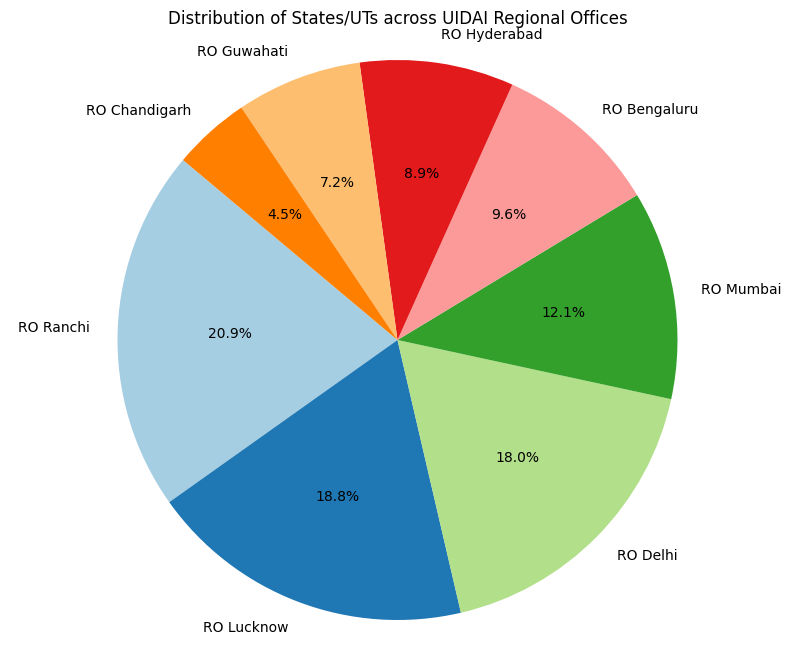

In [13]:
zonal_counts = final_df.groupby('region')['Enrolments'].sum().reset_index().sort_values('Enrolments', ascending=False)
print(zonal_counts)
plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(zonal_counts)))
plt.pie(zonal_counts['Enrolments'], labels=zonal_counts['region'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of States/UTs across UIDAI Regional Offices')
plt.axis('equal')

##State vs enrolment

/tmp/ipython-input-2217557770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Enrolments', y='state_clean', data=df_sorted, palette='viridis')


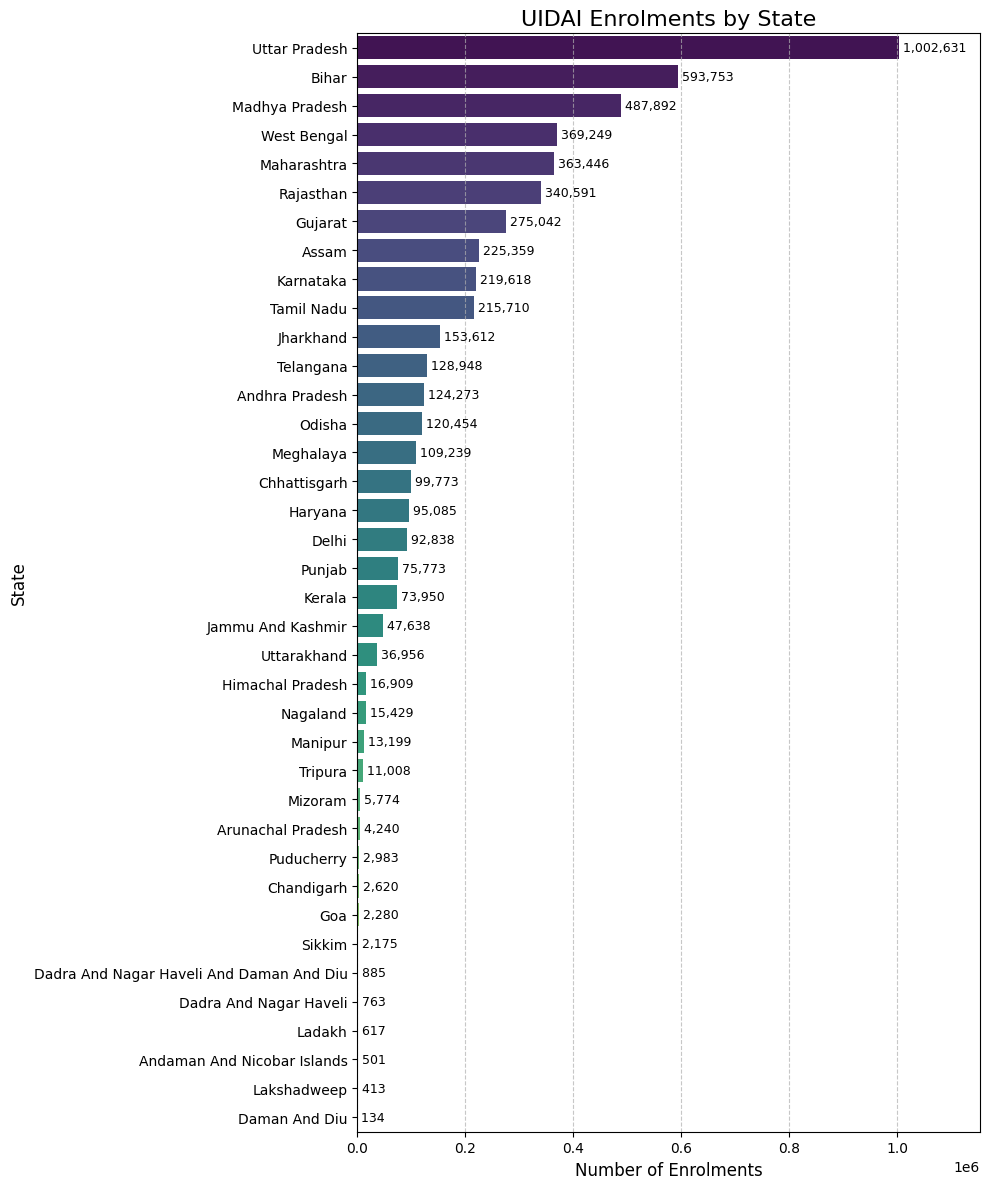

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df['Enrolments'] = final_df['age_0_5'] + final_df['age_5_17'] + final_df['age_18_greater']
df_sorted = final_df.groupby('state_clean')['Enrolments'].sum().reset_index().sort_values('Enrolments', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='Enrolments', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments by State', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['Enrolments']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['Enrolments'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## State vs enrollment (age 0-5)

/tmp/ipython-input-339731206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_0_5', y='state_clean', data=df_sorted, palette='viridis')


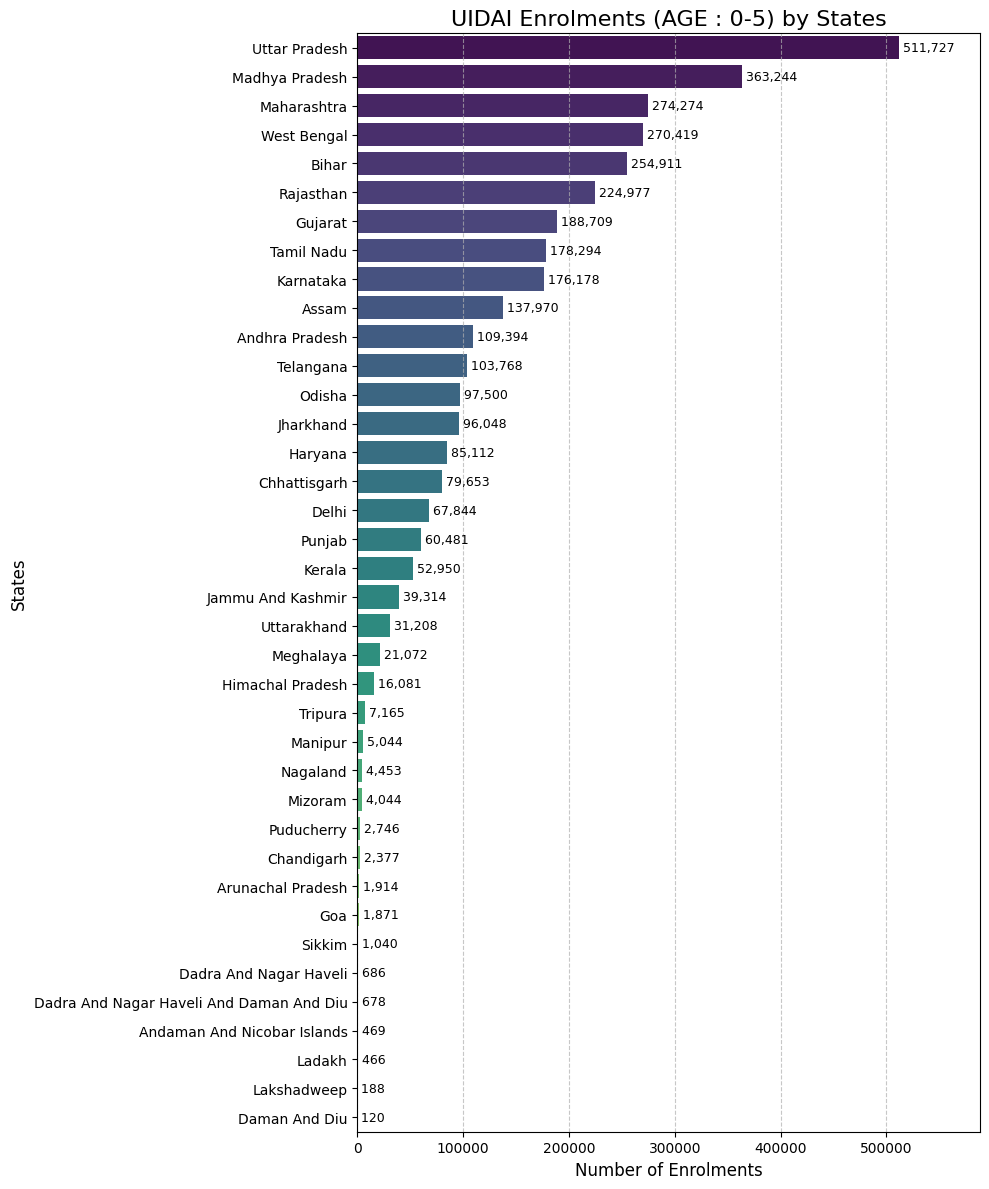

In [ ]:
df_sorted = final_df.groupby('state_clean')['age_0_5'].sum().reset_index().sort_values('age_0_5', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='age_0_5', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 0-5) by States', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_0_5']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_0_5'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## state vs enrollment (age 5-17)

/tmp/ipython-input-876157995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_5_17', y='state_clean', data=df_sorted, palette='viridis')


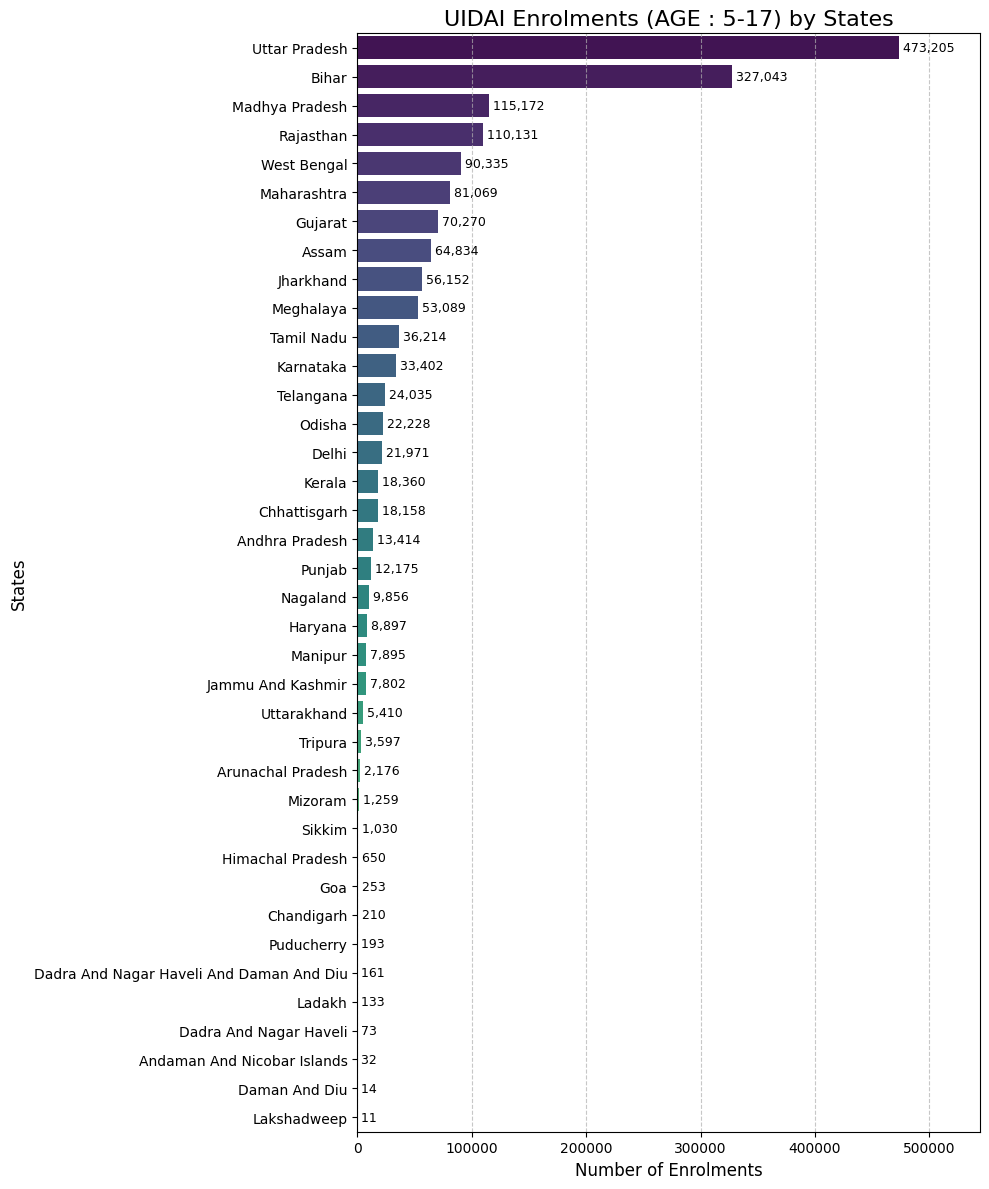

In [ ]:
df_sorted = final_df.groupby('state_clean')['age_5_17'].sum().reset_index().sort_values('age_5_17', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='age_5_17', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 5-17) by States', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2536153492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_18_greater', y='state_clean', data=df_sorted, palette='viridis')


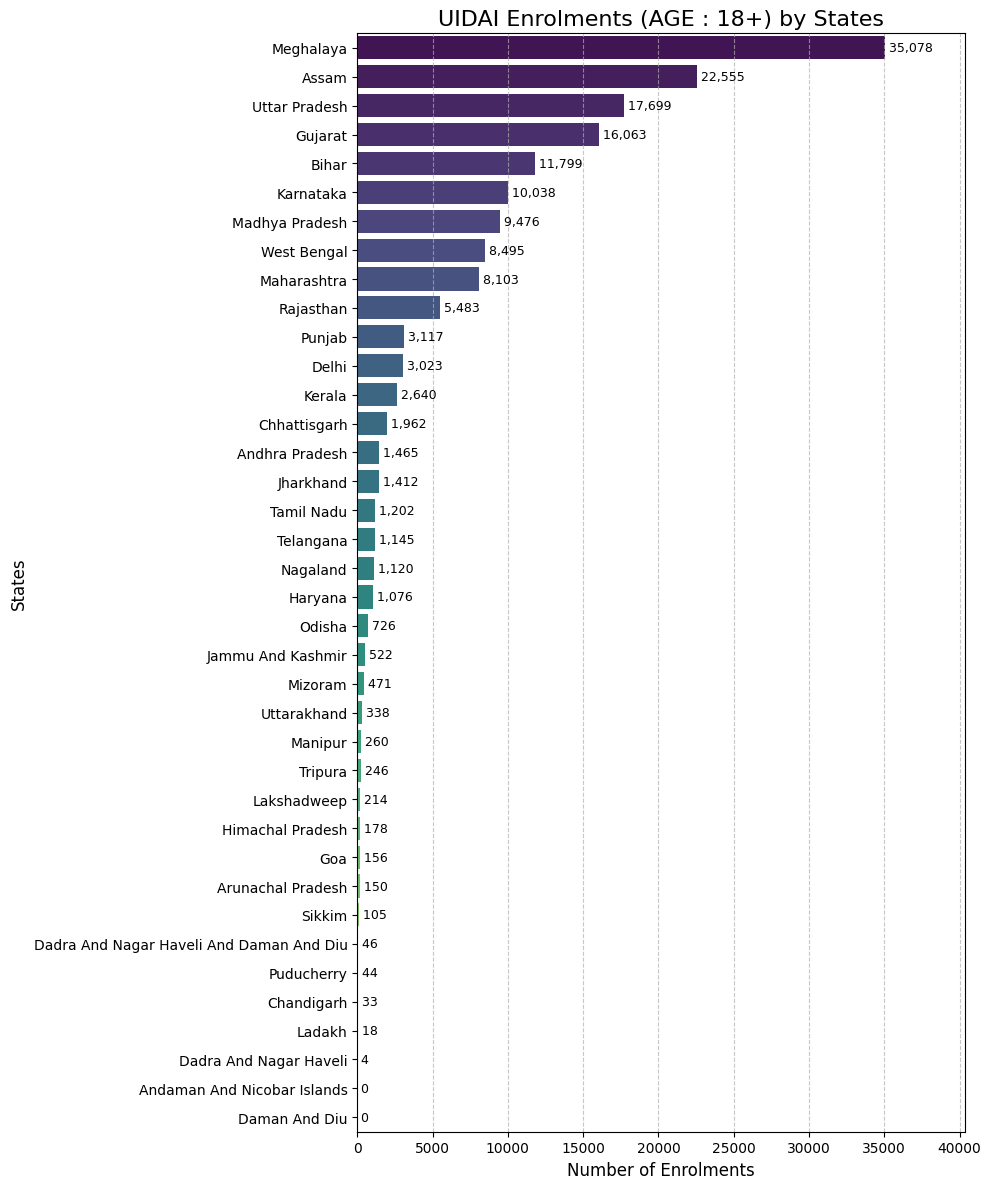

In [18]:
df_sorted = final_df.groupby('state_clean')['age_18_greater'].sum().reset_index().sort_values('age_18_greater', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(x='age_18_greater', y='state_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 18+) by States', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_18_greater']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_18_greater'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## District vs enrolment

/tmp/ipython-input-280103178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Enrolments', y='district_clean', data=df_sorted, palette='viridis')


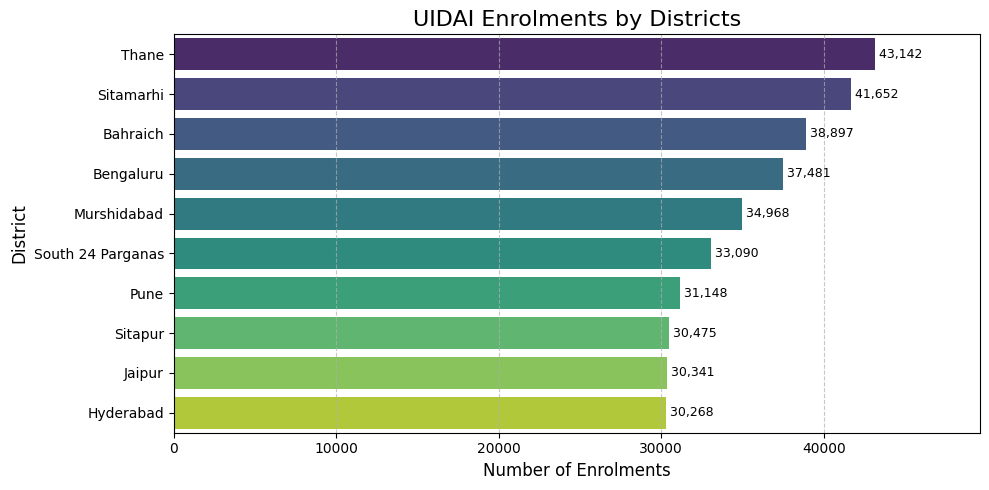

In [ ]:
df_sorted = final_df.groupby('district_clean')['Enrolments'].sum().reset_index().sort_values('Enrolments', ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x='Enrolments', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments by Districts', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['Enrolments']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['Enrolments'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## district vs enrolment (age 0-5)

/tmp/ipython-input-1215095625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_0_5', y='district_clean', data=df_sorted, palette='viridis')


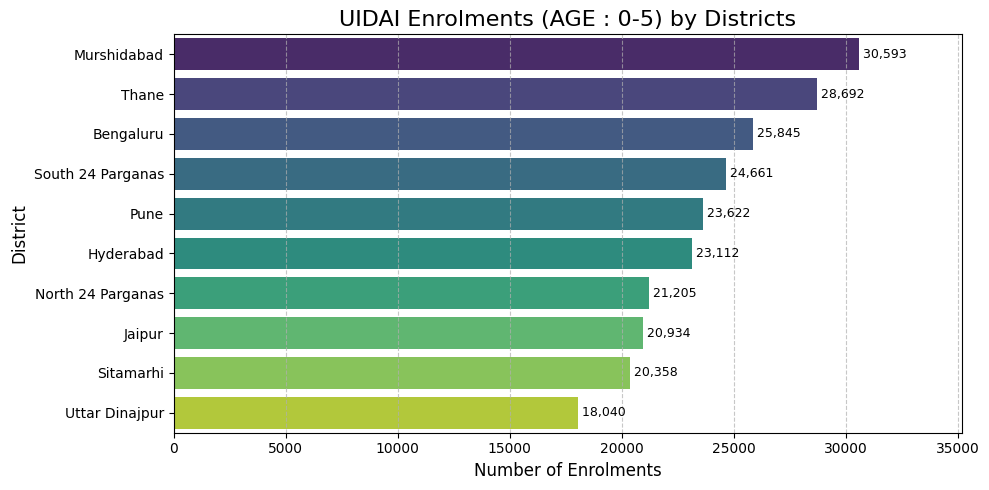

In [ ]:
df_sorted = final_df.groupby('district_clean')['age_0_5'].sum().reset_index().sort_values('age_0_5', ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x='age_0_5', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 0-5) by Districts', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_0_5']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_0_5'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## district vs age (5-17)

/tmp/ipython-input-3779300050.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_5_17', y='district_clean', data=df_sorted, palette='viridis')


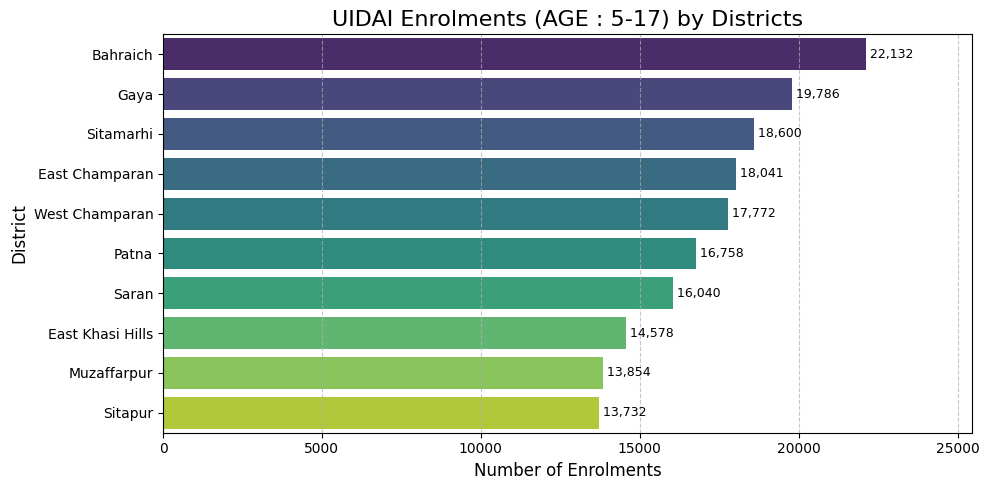

In [ ]:
df_sorted = final_df.groupby('district_clean')['age_5_17'].sum().reset_index().sort_values('age_5_17', ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x='age_5_17', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 5-17) by Districts', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_5_17']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_5_17'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

## district vs age (18+)

/tmp/ipython-input-2919982868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_18_greater', y='district_clean', data=df_sorted, palette='viridis')


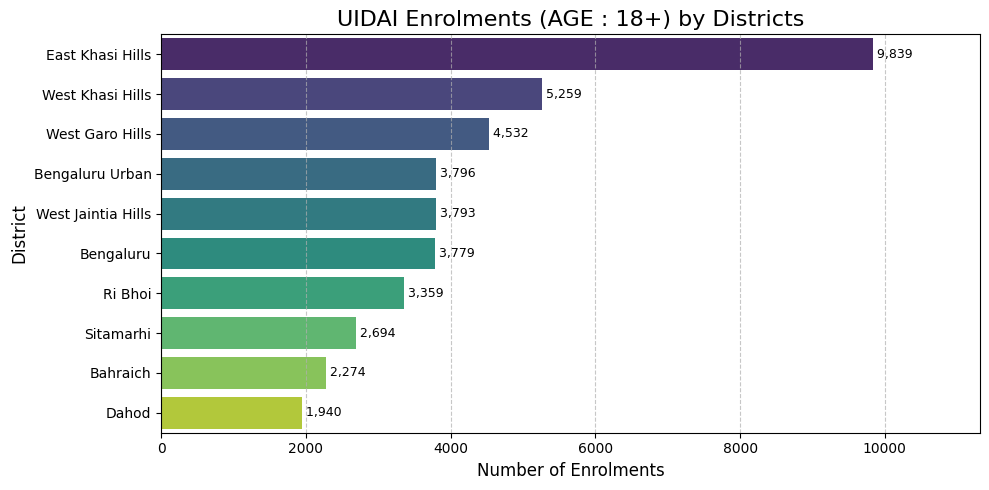

In [ ]:
df_sorted = final_df.groupby('district_clean')['age_18_greater'].sum().reset_index().sort_values('age_18_greater', ascending=False).head(10)

plt.figure(figsize=(10, 5))

sns.barplot(x='age_18_greater', y='district_clean', data=df_sorted, palette='viridis')

plt.title('UIDAI Enrolments (AGE : 18+) by Districts', fontsize=16)
plt.xlabel('Number of Enrolments', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for index, value in enumerate(df_sorted['age_18_greater']):

    label = f'{value:,}'

    plt.text(value, index, f' {label}', va='center', fontsize=9)

max_val = df_sorted['age_18_greater'].max()

plt.xlim(0, max_val * 1.15)

plt.tight_layout()
plt.show()

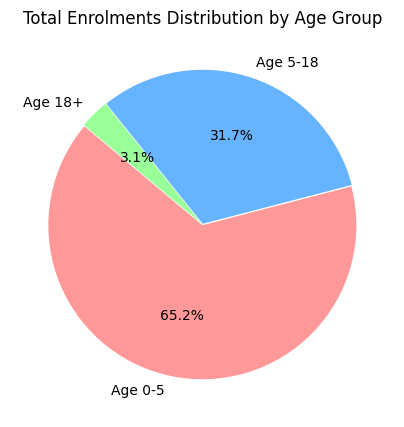

In [5]:
import matplotlib.pyplot as plt

total_0_5 = final_df['age_0_5'].sum()
total_5_18 = final_df['age_5_17'].sum()
total_18_above = final_df['age_18_greater'].sum()

labels = ['Age 0-5', 'Age 5-18', 'Age 18+']
sizes = [total_0_5, total_5_18, total_18_above]
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0.005, 0.005, 0.005)
)

plt.title('Total Enrolments Distribution by Age Group')
plt.show()

##month wise analysis

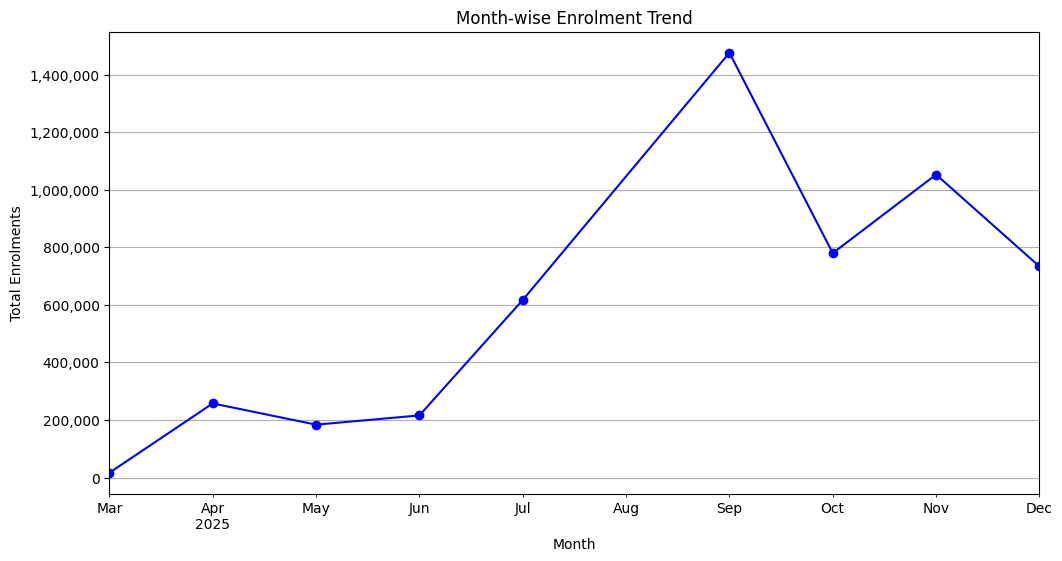

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 1. Convert the 'date' column to real Datetime objects
# (Replace 'date' with your actual column name, e.g., 'Date' or 'Aadhaar_Date')
final_df['date'] = pd.to_datetime(final_df['date'], format='%d-%m-%Y')
# Note: If your date format is DD-MM-YYYY, use format='%d-%m-%Y'

# 2. Extract the Month and Year (e.g., "2024-01")
final_df['Month_Year'] = final_df['date'].dt.to_period('M')

# 3. Group by this new column and sum the enrolments
monthly_data = final_df.groupby('Month_Year')['Enrolments'].sum()

# 4. Plot the Trend
plt.figure(figsize=(12, 6))
ax = monthly_data.plot(kind='line', marker='o', color='b') # 'line' shows trend better

plt.title('Month-wise Enrolment Trend')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.grid(True)
def format_with_commas(x, pos):
    return f'{int(x):,}'
ax.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.show()

# Iinsights

In [14]:
print("-"*50)
print("Total Enrolments: ", final_df['Enrolments'].sum())
print("Total Date")
print("Total unique pincods", final_df['pincode'].nunique())
print("-"*50)

--------------------------------------------------
Total Enrolments:  5331760
Total Date
Total unique pincods 19463
--------------------------------------------------
